In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',50)

In [108]:
df = pd.read_csv('hotel_bookings.csv')

In [109]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [110]:
df.shape

(119390, 32)

##Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [112]:
df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [113]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


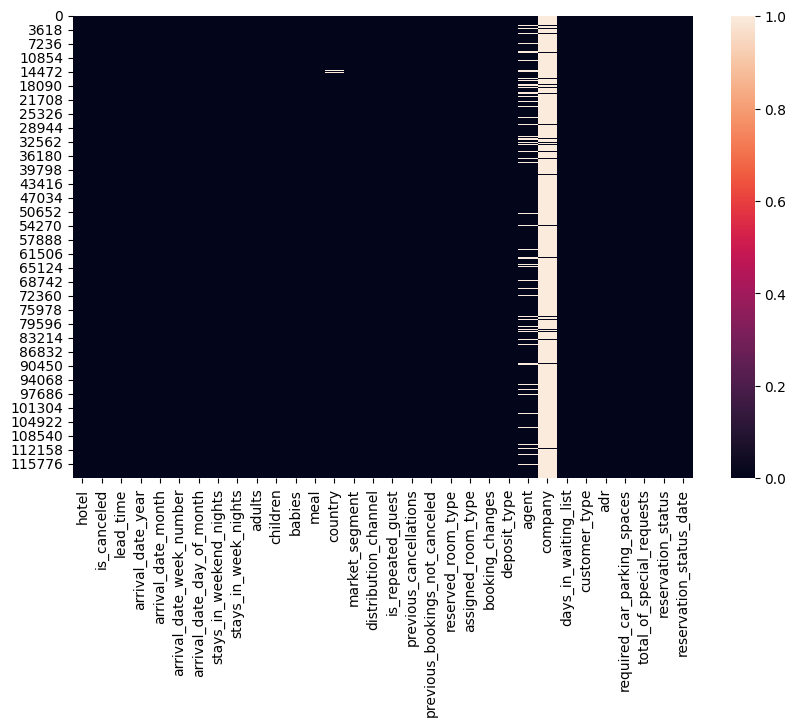

In [114]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull())
plt.show()

In [115]:
#null percentage
missing_percent = df.isnull().mean() * 100

missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent

,0
company,94.306893
agent,13.686238
country,0.408744
children,0.003350


<Axes: ylabel='adr'>

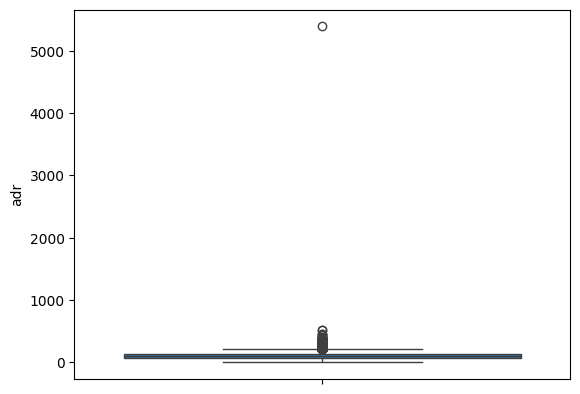

In [116]:
#Detect outliers
sns.boxplot(data=df,y='adr')

<Axes: ylabel='lead_time'>

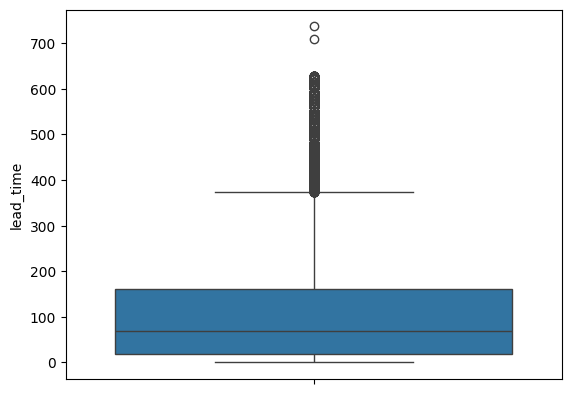

In [117]:
sns.boxplot(data=df,y='lead_time')

##Phase 2: Data Cleaning

In [118]:
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['country'] = df['country'].fillna("Unknown")
df['children'] = df['children'].fillna(df.children.median())

In [119]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [120]:
df.duplicated().sum()

np.int64(31994)

In [121]:
df = df.drop_duplicates().reset_index(drop=True).copy()

In [122]:
df.duplicated().sum()

np.int64(0)

In [123]:
#outliers
df['adr'] = np.where(df['adr'] > 1000, 1000, df['adr'])

Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['lead_time'] = np.where(df['lead_time'] > upper_bound, upper_bound,
                  np.where(df['lead_time'] < lower_bound, lower_bound, df['lead_time']))

In [124]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [125]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,float64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [126]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [127]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,float64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


##Phase 3: Feature Engineering & Preprocessing

In [128]:
df['total_guests'] = df.adults + df.children + df.babies
df['total_nights'] = df.stays_in_weekend_nights + df.stays_in_week_nights
df['is_family'] = (df.children > 0) | (df.babies > 0)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,is_family
0,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,False
1,Resort Hotel,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,False
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,False
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1,False
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,False


In [129]:
#Encode Categorical Variables:
enc_labels = {}
for col in ["hotel",'deposit_type','customer_type','reservation_status','distribution_channel',"reserved_room_type","assigned_room_type","assigned_room_type","reserved_room_type"]:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights,is_family
0,1,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,1,0,0,0,2,2,3,0,0.0,0.0,0,2,0.00,0,0,1,2015-07-01,2.0,0,False
1,1,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,1,0,0,0,2,2,4,0,0.0,0.0,0,2,0.00,0,0,1,2015-07-01,2.0,0,False
2,1,0,7.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,1,0,0,0,0,2,0,0,0.0,0.0,0,2,75.00,0,0,1,2015-07-02,1.0,1,False
3,1,0,13.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,0,0,0,0,0,304.0,0.0,0,2,75.00,0,0,1,2015-07-02,1.0,1,False
4,1,0,14.0,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,3,0,0,0,0,0,0,0,240.0,0.0,0,2,98.00,0,1,1,2015-07-03,2.0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,0,0,23.0,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,3,0,0,0,0,0,0,0,394.0,0.0,0,2,96.14,0,0,1,2017-09-06,2.0,7,False
87392,0,0,102.0,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,3,0,0,0,4,4,0,0,9.0,0.0,0,2,225.43,0,2,1,2017-09-07,3.0,7,False
87393,0,0,34.0,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,3,0,0,0,3,3,0,0,9.0,0.0,0,2,157.71,0,4,1,2017-09-07,2.0,7,False
87394,0,0,109.0,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,3,0,0,0,0,0,0,0,89.0,0.0,0,2,104.40,0,0,1,2017-09-07,2.0,7,False


In [130]:
df = df.drop(['reservation_status','reservation_status_date'],axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family
0,1,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,1,0,0,0,2,2,3,0,0.0,0.0,0,2,0.0,0,0,2.0,0,False
1,1,0,296.0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,1,0,0,0,2,2,4,0,0.0,0.0,0,2,0.0,0,0,2.0,0,False
2,1,0,7.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,1,0,0,0,0,2,0,0,0.0,0.0,0,2,75.0,0,0,1.0,1,False
3,1,0,13.0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,0,0,0,0,0,304.0,0.0,0,2,75.0,0,0,1.0,1,False
4,1,0,14.0,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,3,0,0,0,0,0,0,0,240.0,0.0,0,2,98.0,0,1,2.0,2,False


In [131]:
#Final Preparation: Split your cleaned dataset
x= df.drop("is_canceled",axis=1)
y= df['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)